In [7]:
!pip install scikit-fuzzy

In [8]:
# Import libraries
import numpy as np
from skfuzzy import control as ctrl
from skfuzzy import membership as mf
import matplotlib.pyplot as plt

In [9]:
# Antecedents
pH = ctrl.Antecedent(np.arange(0, 14.1, 0.1), 'pH')
turbidity = ctrl.Antecedent(np.arange(0, 101, 1), 'turbidity')
do = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'dissolved_oxygen')
bacteria = ctrl.Antecedent(np.arange(0, 1001, 1), 'bacteria')
infra = ctrl.Antecedent(np.arange(0, 101, 1), 'infrastructure')

# Consequent
risk = ctrl.Consequent(np.arange(0, 101, 1), 'risk')


In [10]:
# Membership functions
# pH
pH['very_acidic'] = mf.trapmf(pH.universe, [0, 0, 3, 5])
pH['acidic'] = mf.trimf(pH.universe, [3, 5, 7])
pH['neutral'] = mf.trimf(pH.universe, [6, 7, 8])
pH['alkaline'] = mf.trimf(pH.universe, [7, 9, 11])
pH['very_alkaline'] = mf.trapmf(pH.universe, [9, 11, 14, 14])

# Turbidity
turbidity['very_low'] = mf.trimf(turbidity.universe, [0, 0, 2])
turbidity['low'] = mf.trimf(turbidity.universe, [0.5, 15, 29.5])
turbidity['moderate'] = mf.trimf(turbidity.universe, [25, 40, 55])
turbidity['high'] = mf.trimf(turbidity.universe, [50, 70, 90])
turbidity['very_high'] = mf.trapmf(turbidity.universe, [80, 90, 100, 100])

# DO mg/L
do['very_low'] = mf.trapmf(do.universe, [0, 0, 3, 4])
do['low'] = mf.trimf(do.universe, [3, 4, 5])
do['moderate'] = mf.trimf(do.universe, [4.5, 5.5, 6.5])
do['high'] = mf.trimf(do.universe, [6, 6.5, 7])
do['very_high'] = mf.trapmf(do.universe, [6.5, 8, 10, 10])

# Bacteria CFU/ml
bacteria['safe'] = mf.trapmf(bacteria.universe, [0, 0, 0, 100])
bacteria['unfiltered'] = mf.trimf(bacteria.universe, [75, 137.5, 200])
bacteria['caution'] = mf.trapmf(bacteria.universe, [175, 200, 475, 500])
bacteria['critical'] = mf.trapmf(bacteria.universe, [475, 500, 1000, 1000])

# Infrastructure quality
infra['very_poor'] = mf.trapmf(infra.universe, [0, 0, 20, 30])
infra['poor'] = mf.trimf(infra.universe, [20, 35, 50])
infra['fair'] = mf.trimf(infra.universe, [40, 55, 70])
infra['good'] = mf.trimf(infra.universe, [60, 75, 90])
infra['very_good'] = mf.trapmf(infra.universe, [80, 90, 100, 100])

# Output Risk
risk['critical'] = mf.trimf(risk.universe, [85, 100, 100])
risk['high'] = mf.trimf(risk.universe, [60, 75, 90])
risk['moderate'] = mf.trimf(risk.universe, [35, 50, 65])
risk['low'] = mf.trimf(risk.universe, [10, 25, 40])
risk['safe'] = mf.trimf(risk.universe, [0, 0, 20])


In [11]:
# Define fuzzy rules
rules = [

    # -------- CRITICAL (Rules 1–10)
    ctrl.Rule(bacteria['critical'], risk['critical']),
    ctrl.Rule(do['very_low'] & bacteria['unfiltered'], risk['critical']),
    ctrl.Rule(turbidity['very_high'] & bacteria['unfiltered'], risk['critical']),
    ctrl.Rule(bacteria['unfiltered'] & infra['very_poor'], risk['critical']),
    ctrl.Rule(turbidity['very_high'] & do['very_low'] & infra['very_poor'], risk['critical']),
    ctrl.Rule((pH['very_acidic'] | pH['very_alkaline']) & bacteria['unfiltered'], risk['critical']),
    ctrl.Rule(turbidity['very_high'] & do['very_low'] & bacteria['caution'], risk['critical']),
    ctrl.Rule((pH['very_acidic'] | pH['very_alkaline']) & bacteria['caution'] & infra['very_poor'], risk['critical']),
    ctrl.Rule(turbidity['very_high'] & do['very_low'] & bacteria['unfiltered'], risk['critical']),
    ctrl.Rule((bacteria['critical'] | bacteria['unfiltered']) & infra['very_poor'], risk['critical']),


    # -------- HIGH (Rules 11–22)
    ctrl.Rule(bacteria['unfiltered'], risk['high']),
    ctrl.Rule(do['low'] & bacteria['caution'], risk['high']),
    ctrl.Rule(turbidity['high'] & bacteria['caution'], risk['high']),
    ctrl.Rule(do['very_low'] & bacteria['safe'] & (infra['poor'] | infra['very_poor']), risk['high']),
    ctrl.Rule((pH['very_acidic'] | pH['very_alkaline']) & turbidity['high'], risk['high']),
    ctrl.Rule(turbidity['high'] & do['low'] & infra['poor'], risk['high']),
    ctrl.Rule(bacteria['caution'] & infra['poor'], risk['high']),
    ctrl.Rule(turbidity['very_high'] & do['low'], risk['high']),
    ctrl.Rule((pH['acidic'] | pH['alkaline']) & bacteria['caution'], risk['high']),
    ctrl.Rule(turbidity['very_high'] & (infra['fair'] | infra['poor']), risk['high']),
    ctrl.Rule(turbidity['high'] & do['very_low'] & bacteria['safe'], risk['high']),
    ctrl.Rule((pH['very_acidic'] | pH['very_alkaline']) & (do['low'] | do['very_low']) & bacteria['safe'], risk['high']),


    
    # -------- MODERATE (Rules 23–34)
    ctrl.Rule(bacteria['caution'], risk['moderate']),
    ctrl.Rule(pH['neutral'] & turbidity['moderate'] & do['moderate'] & infra['fair'], risk['moderate']),
    ctrl.Rule(turbidity['moderate'] & do['low'] & bacteria['safe'], risk['moderate']),
    ctrl.Rule((pH['acidic'] | pH['alkaline']) & do['moderate'] & infra['poor'], risk['moderate']),
    ctrl.Rule(turbidity['high'] & bacteria['safe'] & infra['good'], risk['moderate']),
    ctrl.Rule(pH['neutral'] & do['low'] & bacteria['safe'], risk['moderate']),
    ctrl.Rule((pH['very_acidic'] | pH['very_alkaline']) & bacteria['caution'], risk['moderate']),
    ctrl.Rule(turbidity['moderate'] & infra['fair'], risk['moderate']),
    ctrl.Rule(pH['neutral'] & do['moderate'] & bacteria['safe'], risk['moderate']),
    ctrl.Rule(pH['neutral'] & turbidity['low'] & do['low'] & bacteria['caution'], risk['moderate']),
    ctrl.Rule(turbidity['moderate'] & bacteria['safe'] & infra['poor'], risk['moderate']),
    ctrl.Rule((pH['acidic'] | pH['alkaline']) & turbidity['moderate'] & do['moderate'], risk['moderate']),


    # -------- LOW (Rules 35–44)
    ctrl.Rule(turbidity['low'] & (do['high'] | do['very_high']) & bacteria['safe'] & infra['good'], risk['low']),
    ctrl.Rule(pH['neutral'] & turbidity['low'] & bacteria['safe'], risk['low']),
    ctrl.Rule(do['high'] & bacteria['safe'] & infra['fair'], risk['low']),
    ctrl.Rule(pH['neutral'] & turbidity['low'] & do['high'], risk['low']),
    ctrl.Rule(pH['neutral'] & turbidity['low'] & do['high'] & bacteria['caution'] & infra['good'], risk['low']),
    ctrl.Rule(pH['neutral'] & bacteria['safe'] & infra['good'], risk['low']),
    ctrl.Rule(turbidity['very_low'] & (do['moderate'] | do['high']) & bacteria['safe'], risk['low']),
    ctrl.Rule(turbidity['low'] & do['moderate'] & infra['good'], risk['low']),
    ctrl.Rule(pH['neutral'] & do['high'] & bacteria['caution'], risk['low']),
    ctrl.Rule(pH['neutral'] & turbidity['low'] & bacteria['safe'] & infra['good'], risk['low']),

    
    ctrl.Rule(turbidity['low'] & (do['high'] | do['very_high']) & bacteria['safe'] & infra['good'], risk['low']),
    ctrl.Rule(pH['neutral'] & turbidity['low'] & bacteria['safe'], risk['low']),
    ctrl.Rule(do['high'] & bacteria['safe'] & infra['fair'], risk['low']),
    ctrl.Rule(pH['neutral'] & turbidity['low'] & do['high'], risk['low']),
    ctrl.Rule(pH['neutral'] & turbidity['low'] & do['high'] & bacteria['caution'] & infra['good'], risk['low']),
    ctrl.Rule(pH['neutral'] & bacteria['safe'] & infra['good'], risk['low']),
    ctrl.Rule(turbidity['very_low'] & (do['moderate'] | do['high']) & bacteria['safe'], risk['low']),
    ctrl.Rule(turbidity['low'] & do['moderate'] & infra['good'], risk['low']),
    ctrl.Rule(pH['neutral'] & do['high'] & bacteria['caution'], risk['low']),
    ctrl.Rule(pH['neutral'] & turbidity['low'] & bacteria['safe'] & infra['good'], risk['low']),


    # -------- SAFE (Rules 45–48)
    ctrl.Rule(pH['neutral'] & (turbidity['very_low'] | turbidity['low']) &(do['high'] | do['very_high']) &bacteria['safe'] &(infra['good'] | infra['very_good']),risk['safe']),
    ctrl.Rule(pH['neutral'] &turbidity['very_low'] &bacteria['safe'] &infra['very_good'],risk['safe']),
    ctrl.Rule((pH['acidic'] | pH['alkaline']) & do['very_high'] & bacteria['safe'] &infra['very_good'],risk['safe']),
    ctrl.Rule(pH['neutral'] &turbidity['very_low'] &do['very_high'] &bacteria['safe'] &infra['very_good'],risk['safe'])

    
]


In [12]:
# Build and Run Fuzzy Controller
risk_ctrl = ctrl.ControlSystem(rules)
risk_sim = ctrl.ControlSystemSimulation(risk_ctrl)


In [13]:
# ---------- TEST WITH SAMPLE INPUT ----------
test_inputs = [
    (6.8, 45, 5.2, 250, 60, "Expected: Moderate"),
    (3.5, 95, 2.0, 850, 15, "Expected: Critical"),
    (7.0, 1.0, 8.5, 5, 95, "Expected: Safe"),
    (5.0, 75, 3.5, 600, 35, "Expected: High"),
    (7.2, 8, 6.8, 45, 78, "Expected: Low"),
]

for ph, turb, do_val, bac, infra_val, label in test_inputs:
    risk_sim = ctrl.ControlSystemSimulation(risk_ctrl)
    risk_sim.input['pH'] = ph
    risk_sim.input['turbidity'] = turb
    risk_sim.input['dissolved_oxygen'] = do_val
    risk_sim.input['bacteria'] = bac
    risk_sim.input['infrastructure'] = infra_val
    risk_sim.compute()

    print(f"\n{label}")
    print(f"Input = pH:{ph}, Turb:{turb}, DO:{do_val}, Bacteria:{bac}, Infra:{infra_val}")
    print(f"Risk Score = {risk_sim.output['risk']:.2f}")



Expected: Moderate
Input = pH:6.8, Turb:45, DO:5.2, Bacteria:250, Infra:60
Risk Score = 53.83

Expected: Critical
Input = pH:3.5, Turb:95, DO:2.0, Bacteria:850, Infra:15
Risk Score = 95.00

Expected: Safe
Input = pH:7.0, Turb:1.0, DO:8.5, Bacteria:5, Infra:95
Risk Score = 9.64

Expected: High
Input = pH:5.0, Turb:75, DO:3.5, Bacteria:600, Infra:35
Risk Score = 82.90

Expected: Low
Input = pH:7.2, Turb:8, DO:6.8, Bacteria:45, Infra:78
Risk Score = 19.50


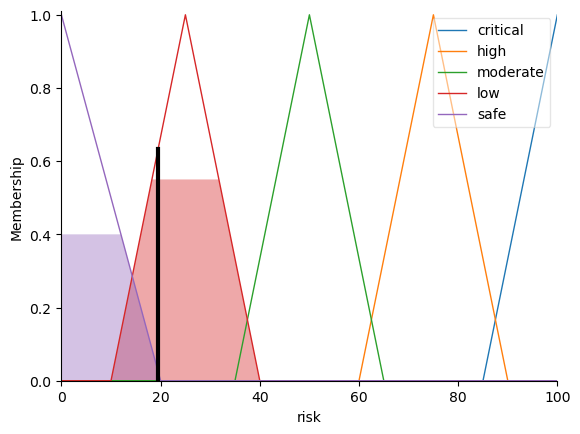

In [15]:
# ---------- VISUALISE THE OUTPUT ----------
risk.view(sim=risk_sim)
plt.show()